# Project on supervised machine learning models



###  Objective of the project: 

Studying customer churn for an Internet and telephony service provider:
   - data research
   - cohort analysis of customer churn
   - predictive machine learning

**Create a model for predicting whether a subscriber will churn.**


----
----

## Part 0: Importing libraries and loading data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: General data characteristics

**Using the .info() method, we will check the data types for the columns, as well as whether there are missing values in the dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Let's display statistical metrics for numeric columns using .describe(). We'll see that most of the columns are categorical, so we'll need to create dummy variables for them later.**

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2: Data Exploration

## Research of signs

**Let's check that there are no missing values ​​in this data - to do this, we'll display the number of NaN values ​​separately for each column.**

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Let's build a CountPlot graph to check whether the column values ​​are balanced with the classes (Churn).**

<Axes: xlabel='Churn', ylabel='count'>

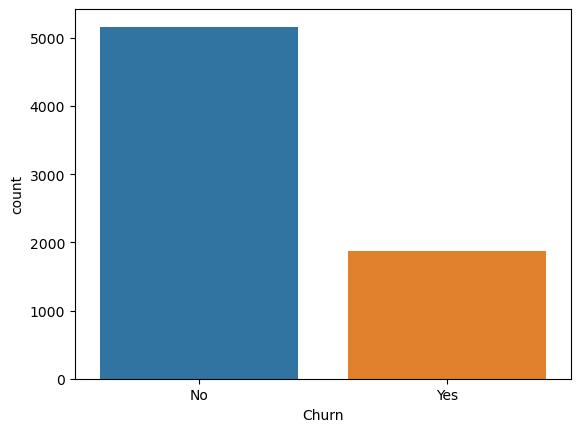

In [7]:
sns.countplot(data=df,x='Churn')

**Let's examine the distribution of the TotalCharges column across various Churn categories using the Violin Plot graph.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

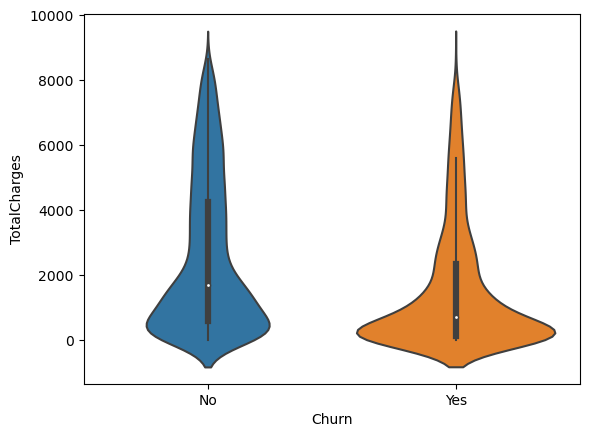

In [8]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

**Let's build a boxplot graph with the distribution of the TotalCharges column for various types of contracts, and also add coloring for the Churn column.**

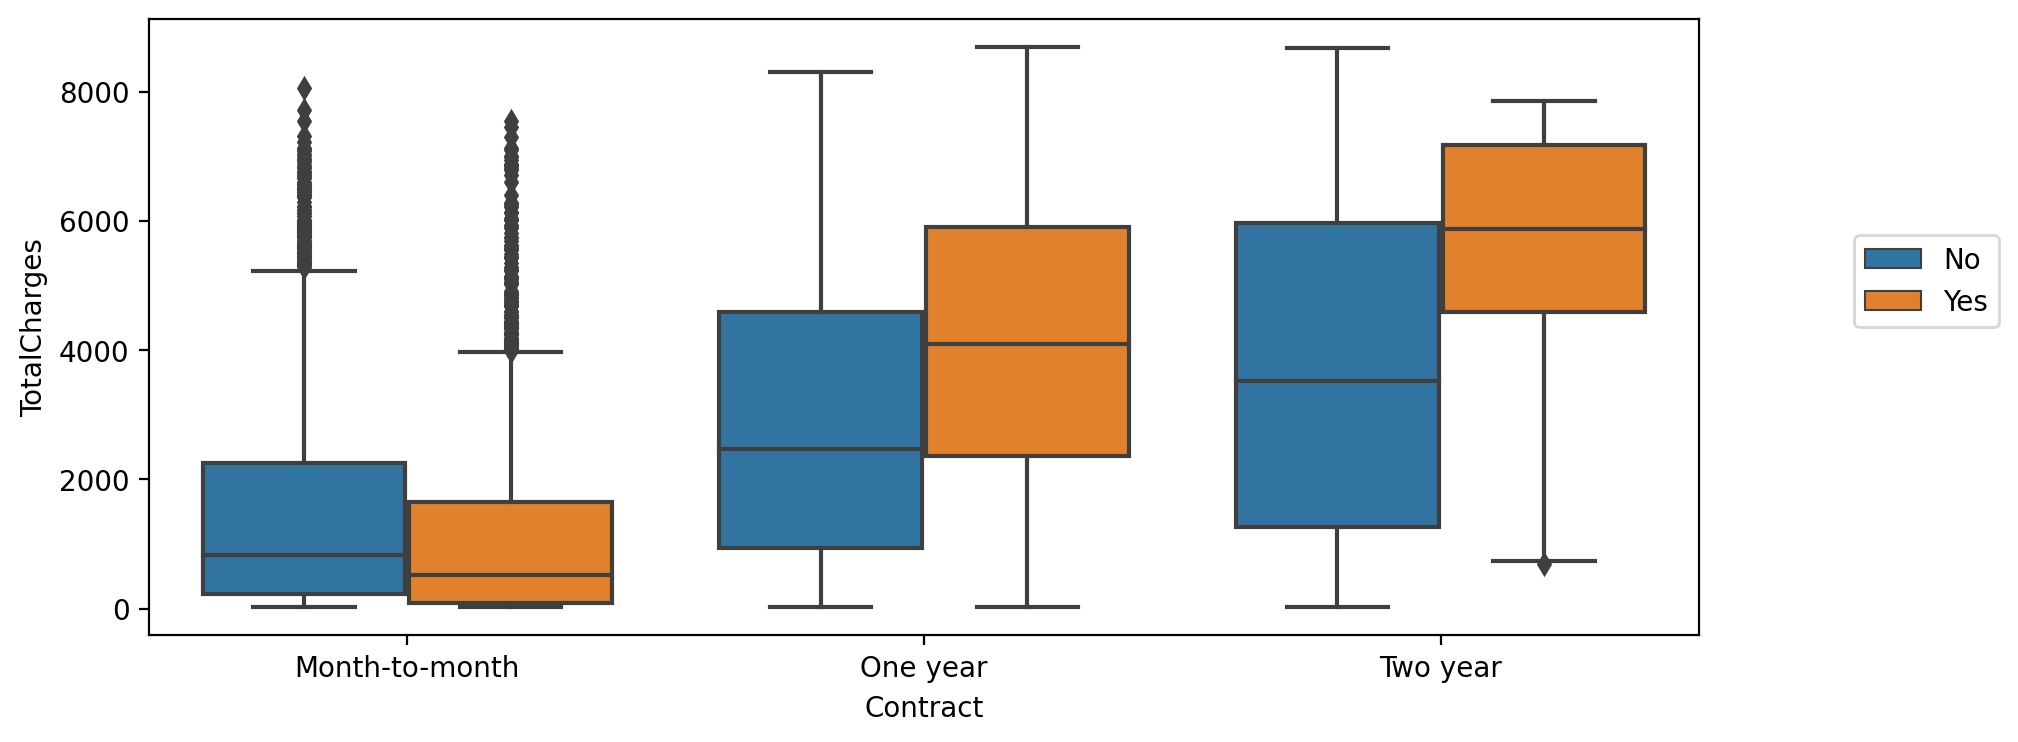

In [9]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

**Let's build a barplot based on the correlation of the following features with the target variable.** 

***For categorical features, we first convert them into dummy variables, because the correlation is calculated only for numeric columns.***

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [12]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

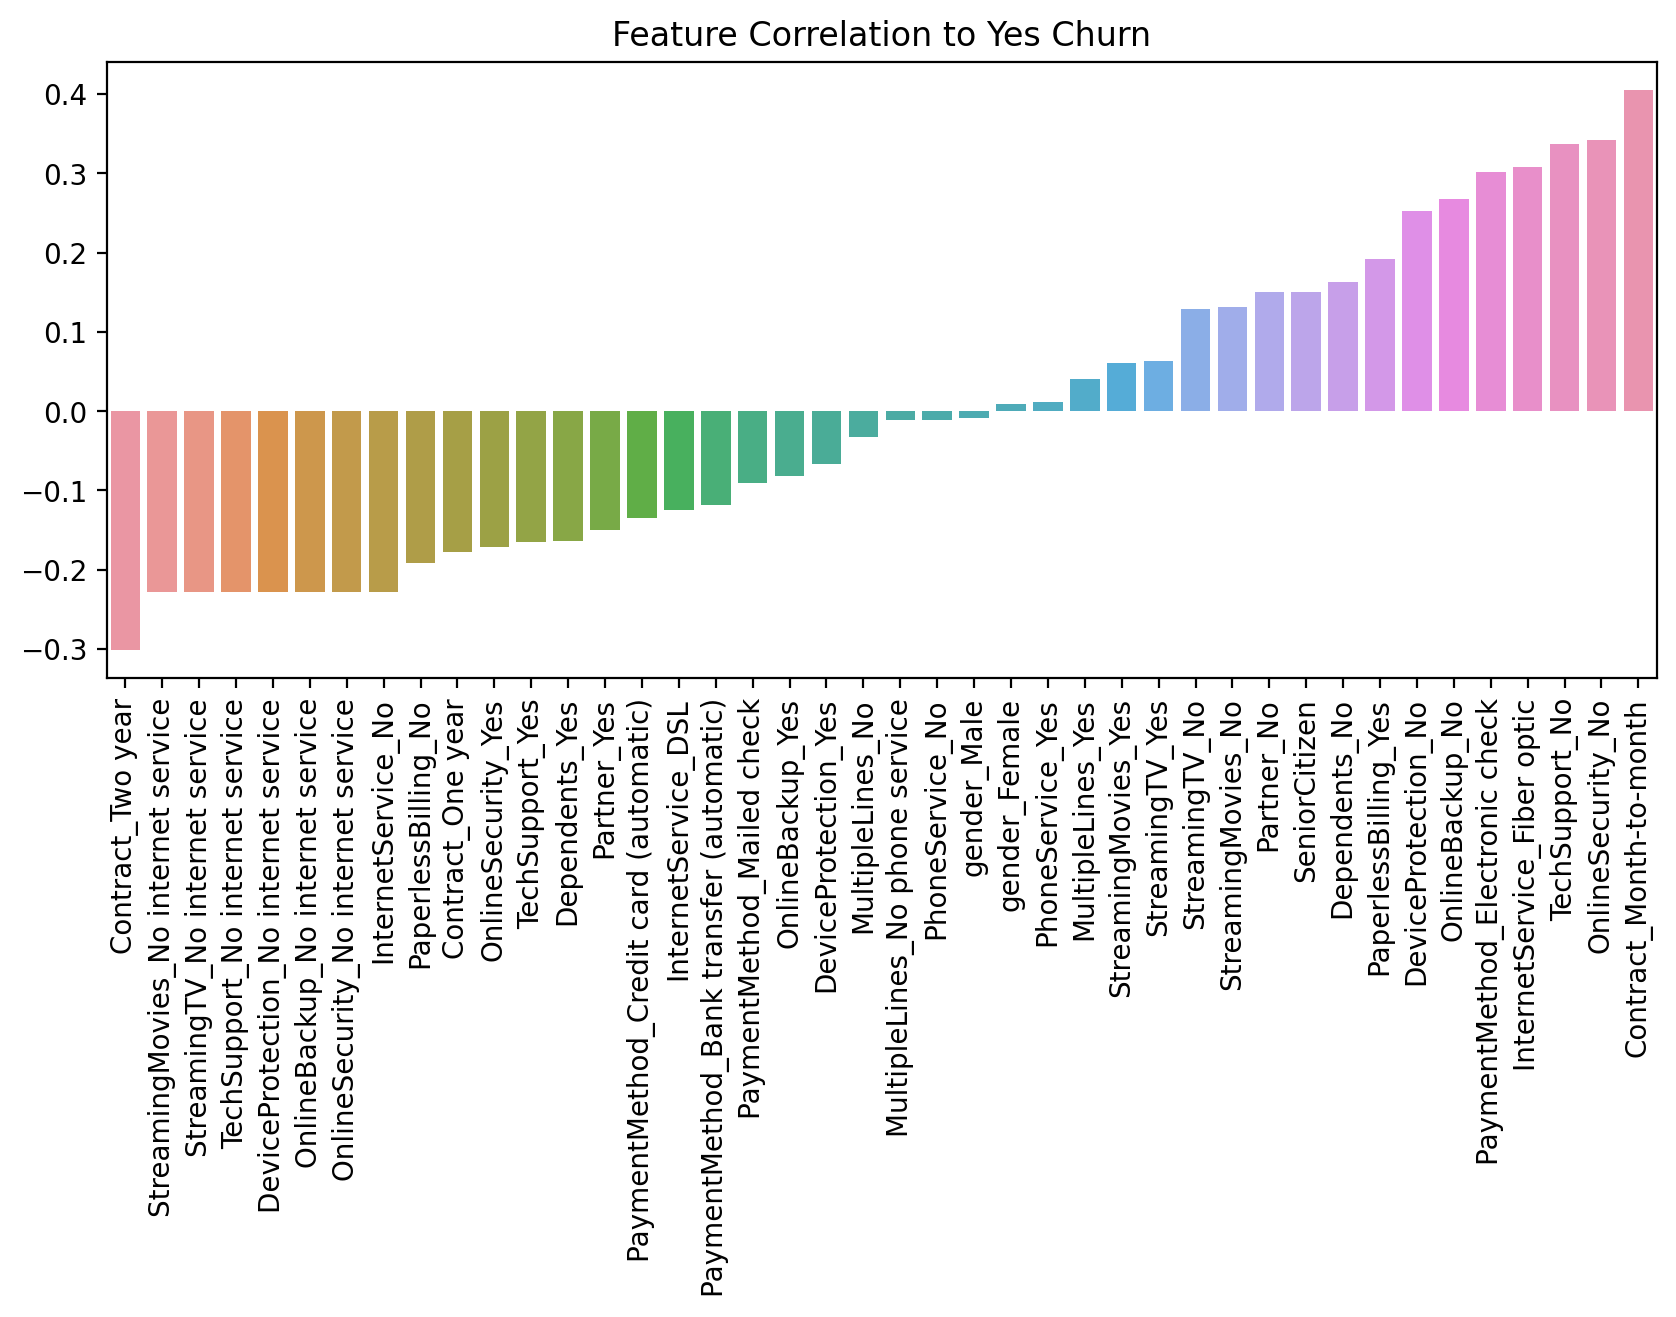

In [13]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

---
---

# Part 3: Churn Analysis

**Let's perform subscriber segmentation based on the tenure column, creating “cohorts” and comparing data between different cohorts.**

**Перечислим типы контрактов.**

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Let's create a histogram with the distribution of values ​​in the tenure column - this is the number of months for how long a person has been (or was) a subscriber of the company.**

<Axes: xlabel='tenure', ylabel='Count'>

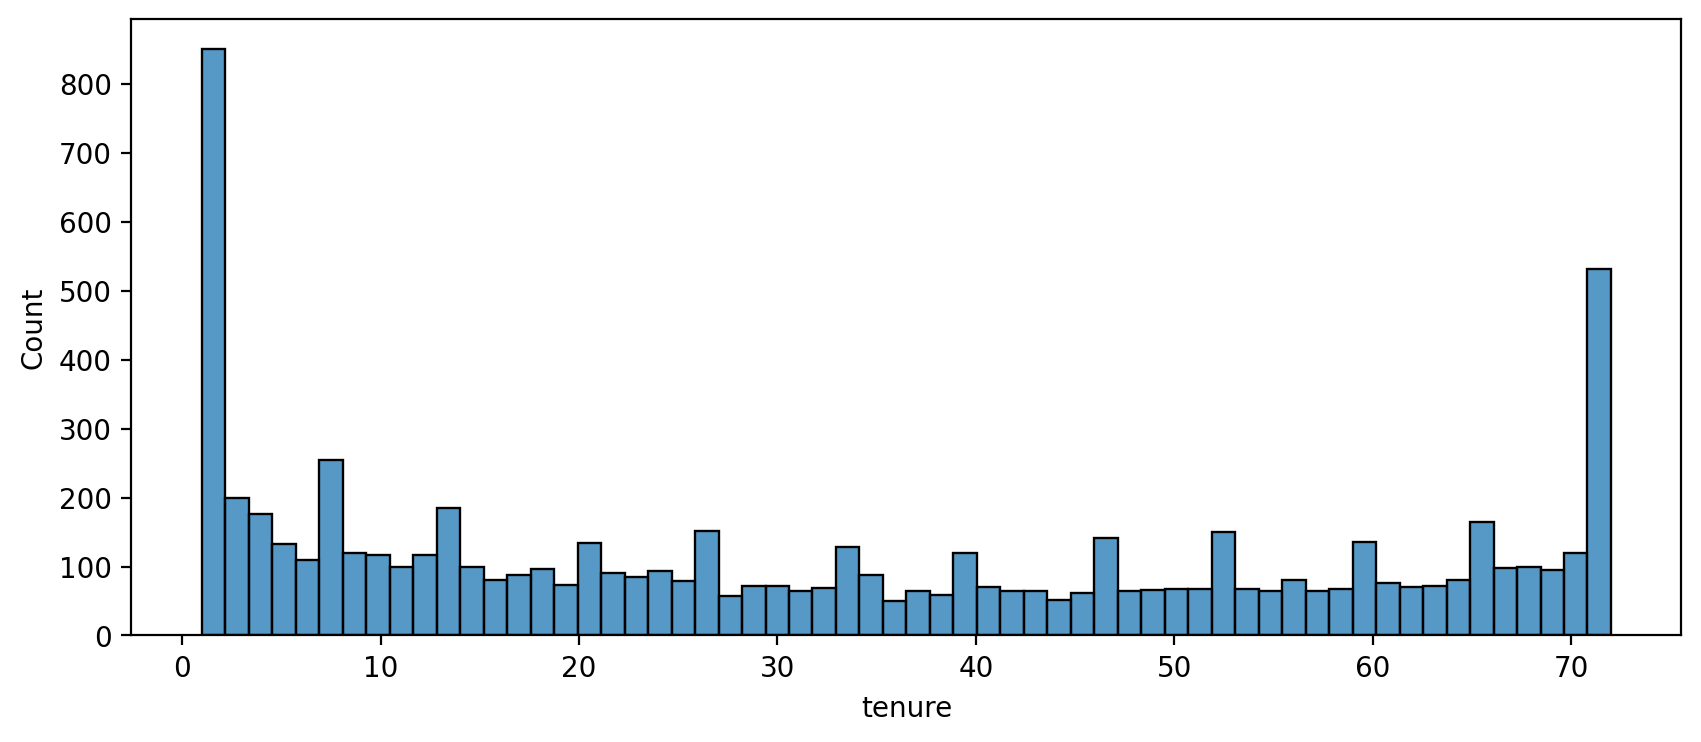

In [15]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

**Let's build histograms for the tenure column, dividing the data into two columns - Churn and Contract.**

<Figure size 2000x600 with 0 Axes>

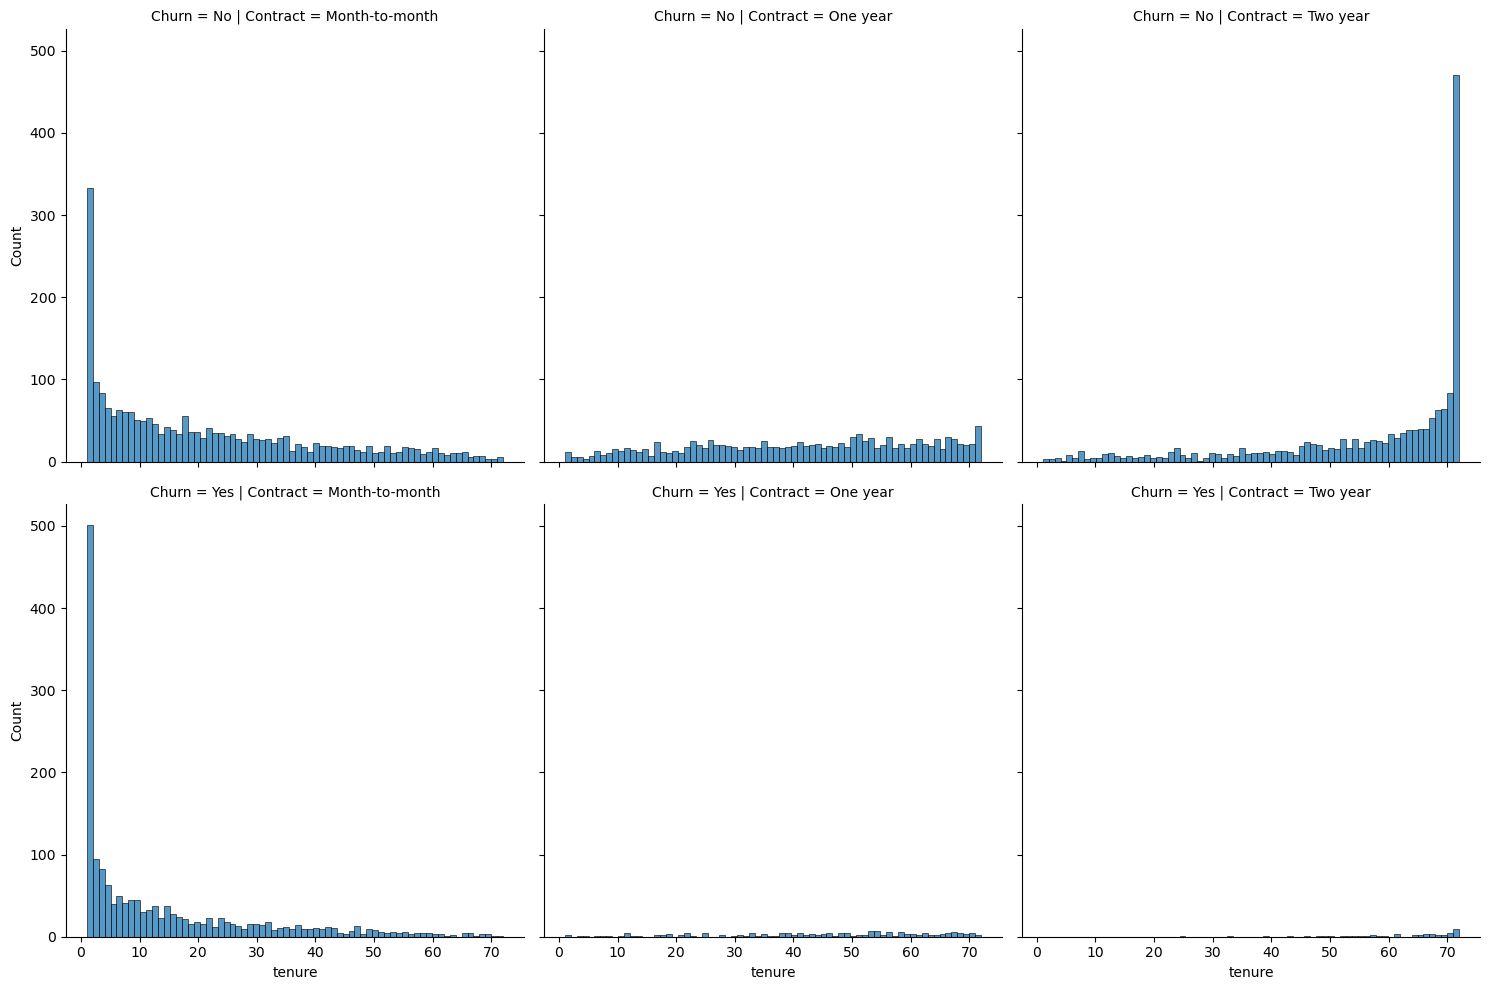

In [16]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**Let's build a scatterplot for the Total Charges and Monthly Charges columns, coloring the graph with colors based on the Churn column.**

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

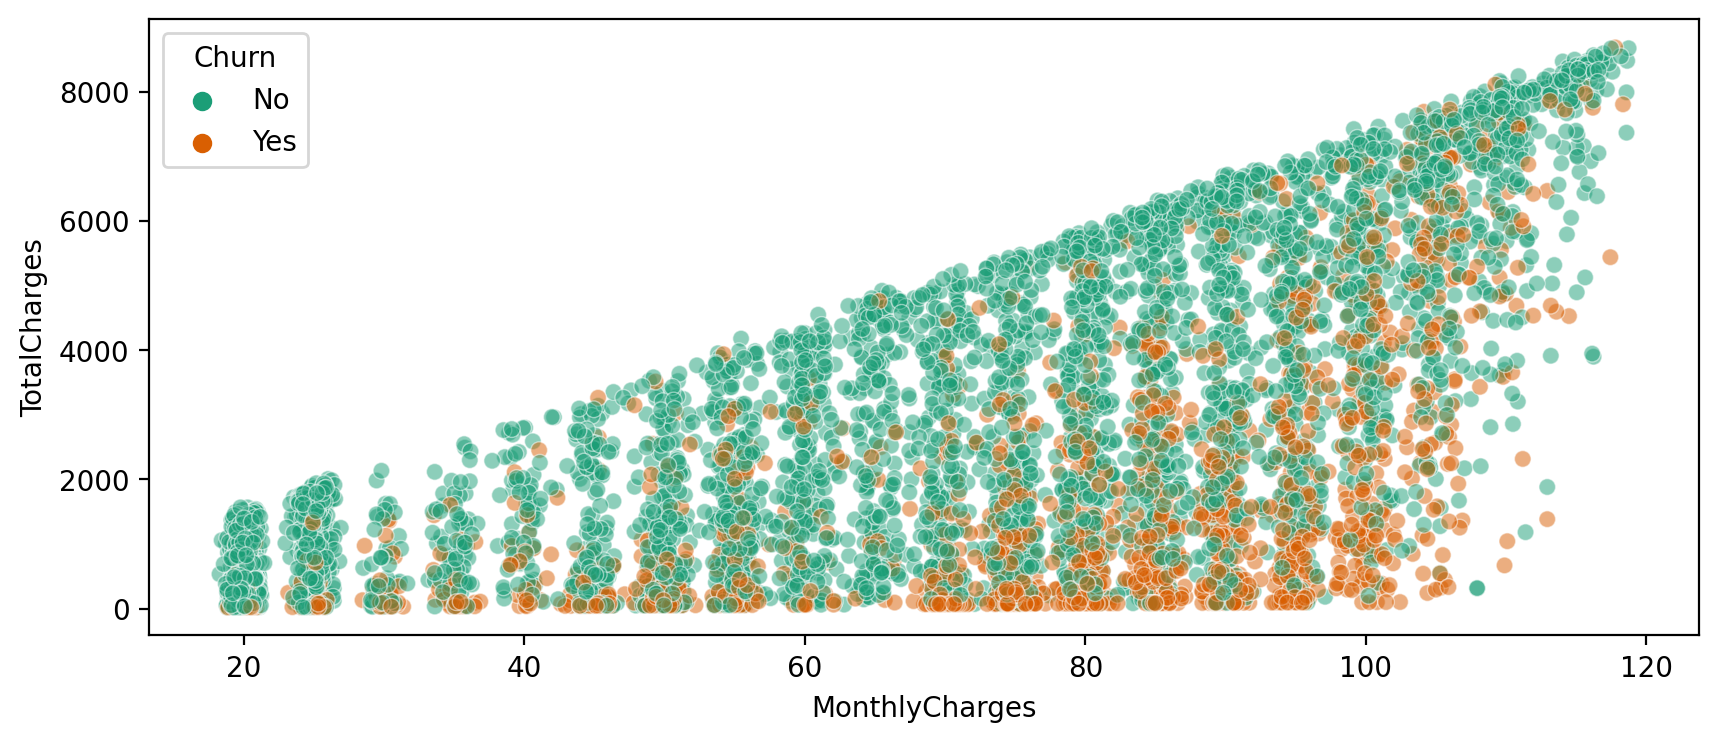

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

### Creating cohorts (segments) using the Tenure column

**First, let's put different tenure values (1 month, 2 months, 3 months, and so on) into separate cohorts (segments).**

**For each unique value of the tenure column as a cohort, we calculate the churn percentage - this is the number of people who churn in the cohort as a percentage of the total number of people in this cohort. Let's calculate this percentage separately for each cohort.** 

**The result will be cohorts from 1 to 72 months, and as the number of months increases, the level of churn should decrease, because the longer a person uses the company’s services, the more likely it is that he/she is satisfied with everything and will continue to use these services.**

In [19]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [20]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [21]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Using the results of the previous task, we will plot the percentage of churn for various values ​​of tenure.**

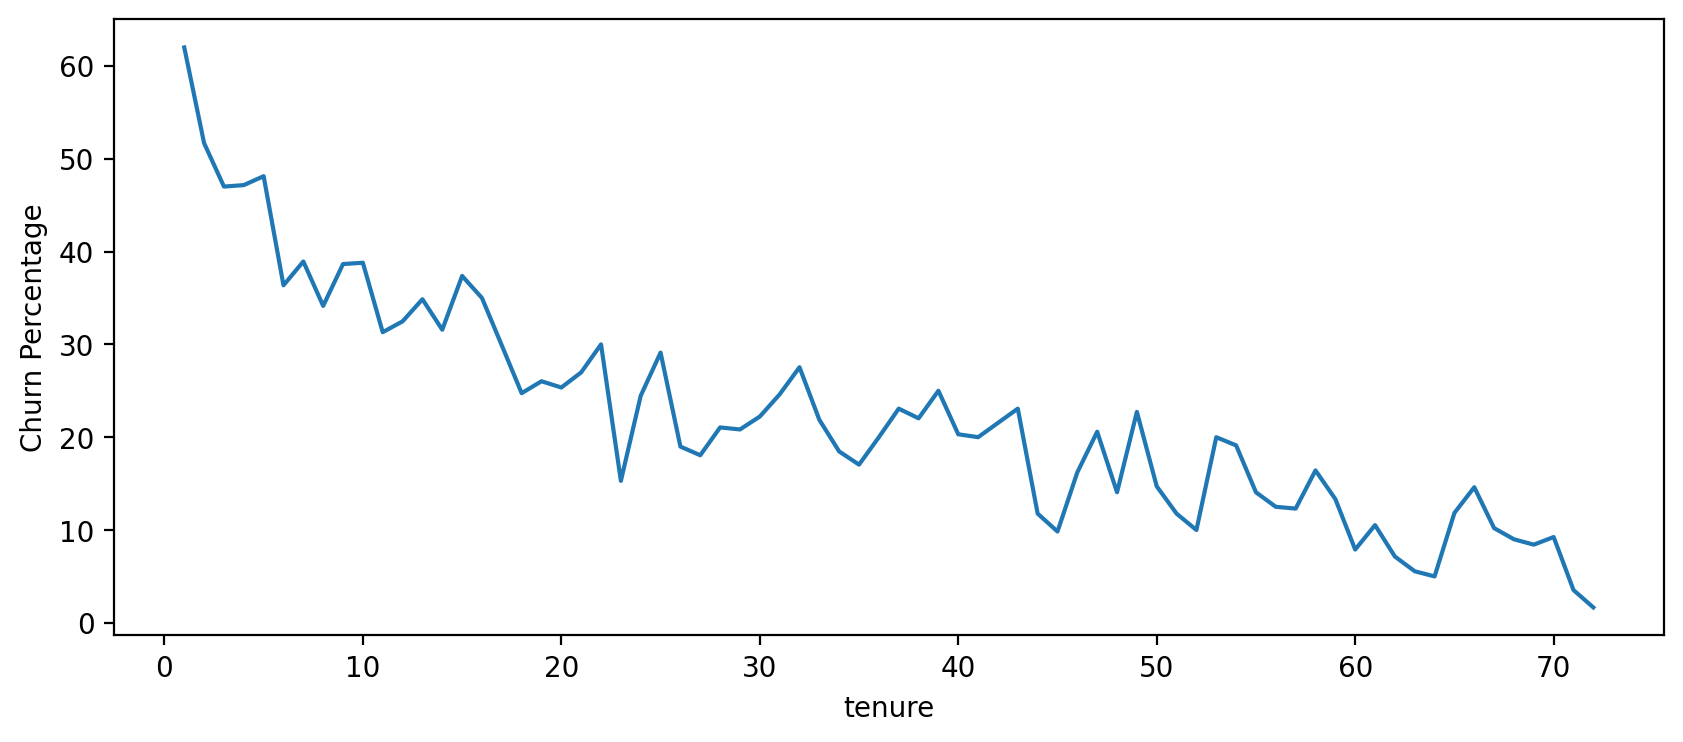

In [22]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Larger cohorts (segments)
**Based on the tenure column, we will create a new column called “Tenure Cohort”, which will have the following 4 categories:**
   * '0-12 months'
   * '12-24 months'
   * '24-48 months'
   * 'More than 48 months'    

In [23]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [24]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [25]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**Let's build a scatterplot for Total Charges and Monthly Charts, coloring the graph with different colors in the "Tenure Cohort" column.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

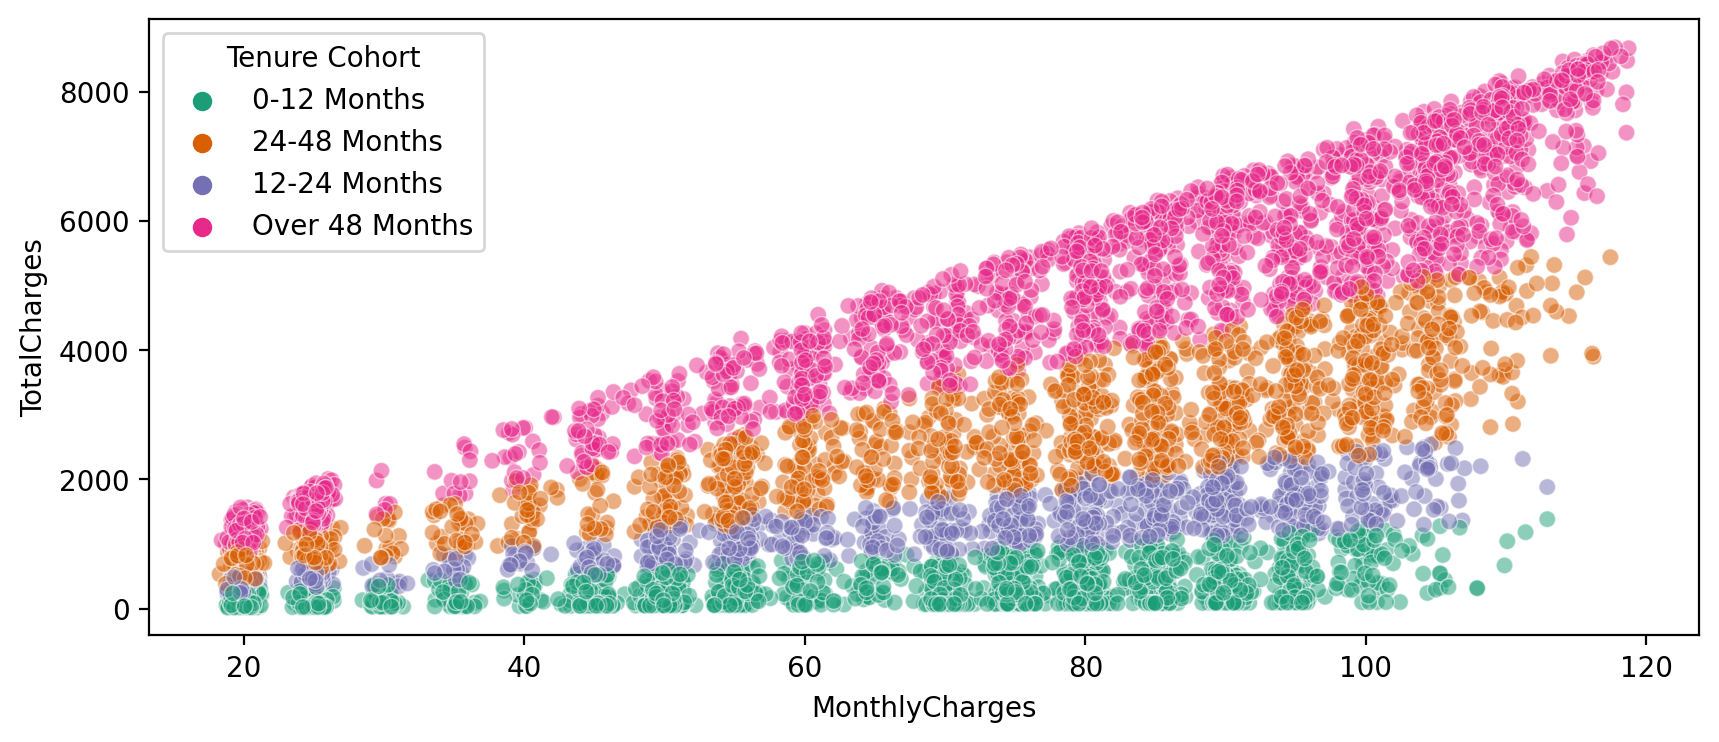

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')

**Let's build a countplot graph with the number of people who left and did not leave in each cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

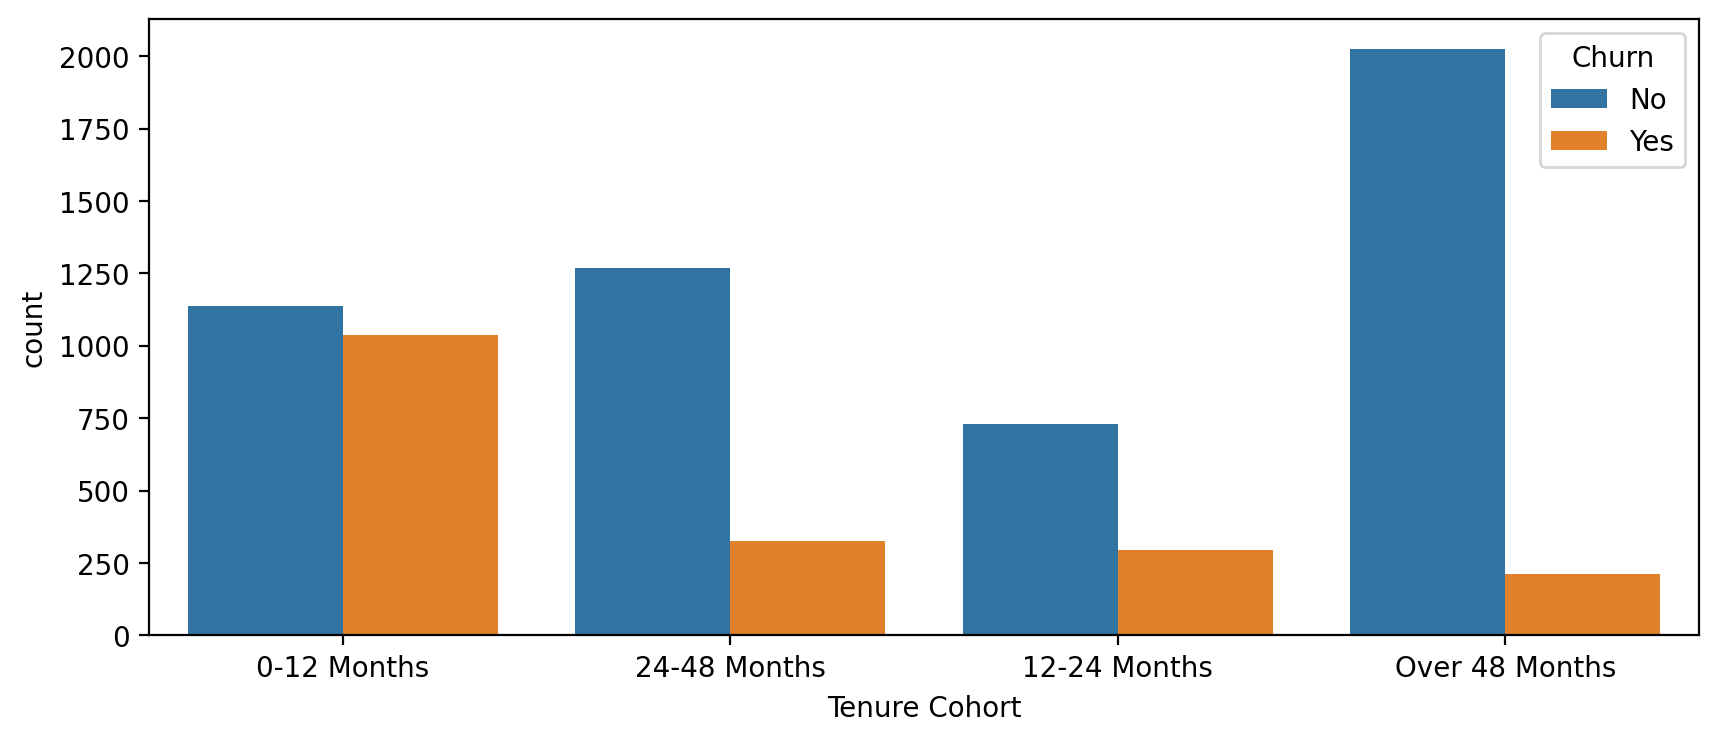

In [27]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

**Let's create a set of CountPlot graphs with the number of people in different Tenure Cohort cohorts. For each type of contract, we will create a separate chart, and color these charts in different colors in the Churn column.**

<Figure size 2000x800 with 0 Axes>

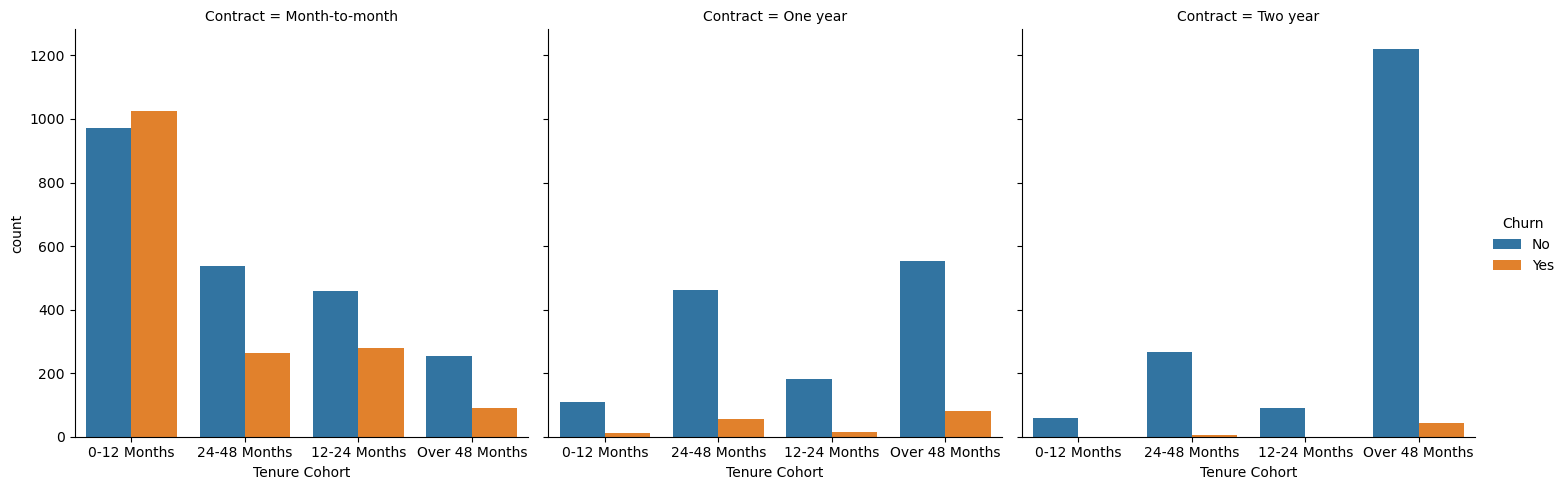

In [28]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

-----

# Part 4: Predictive Model

**We will explore 4 tree-based models: one decision tree, random forest, adaptive boosting and gradient boosting.**


## One decision tree

**Let's divide all the data into features X and the target variable Y. Let's create dummy variables where necessary, and also see if there are any features that could be removed.**

In [29]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [30]:
y = df['Churn']

**Let's split the data into training and test sets (train test split), setting aside 10% of the data for testing.**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Let's build a Decision Tree model and evaluate its performance. To do this, follow these steps:**
   1. Let's train a decision tree model.
   2. Let's evaluate the performance metrics of the decision tree model - to do this, we'll display a "classification report" and draw a graph with an error matrix.
   2. Let's look at the importance of features for the resulting decision tree.
   4. Let's draw a graph of the resulting tree.

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier(max_depth=6)

In [35]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [36]:
preds = dt.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [38]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



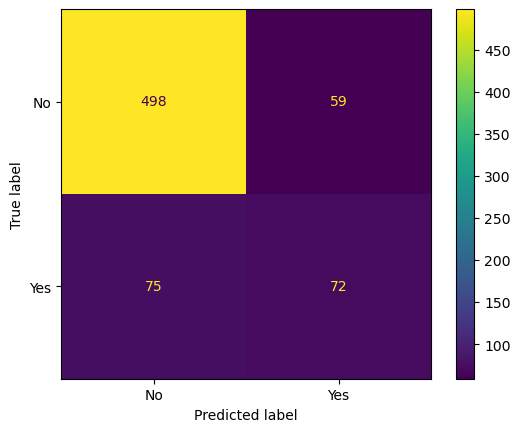

In [39]:
ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)

In [40]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

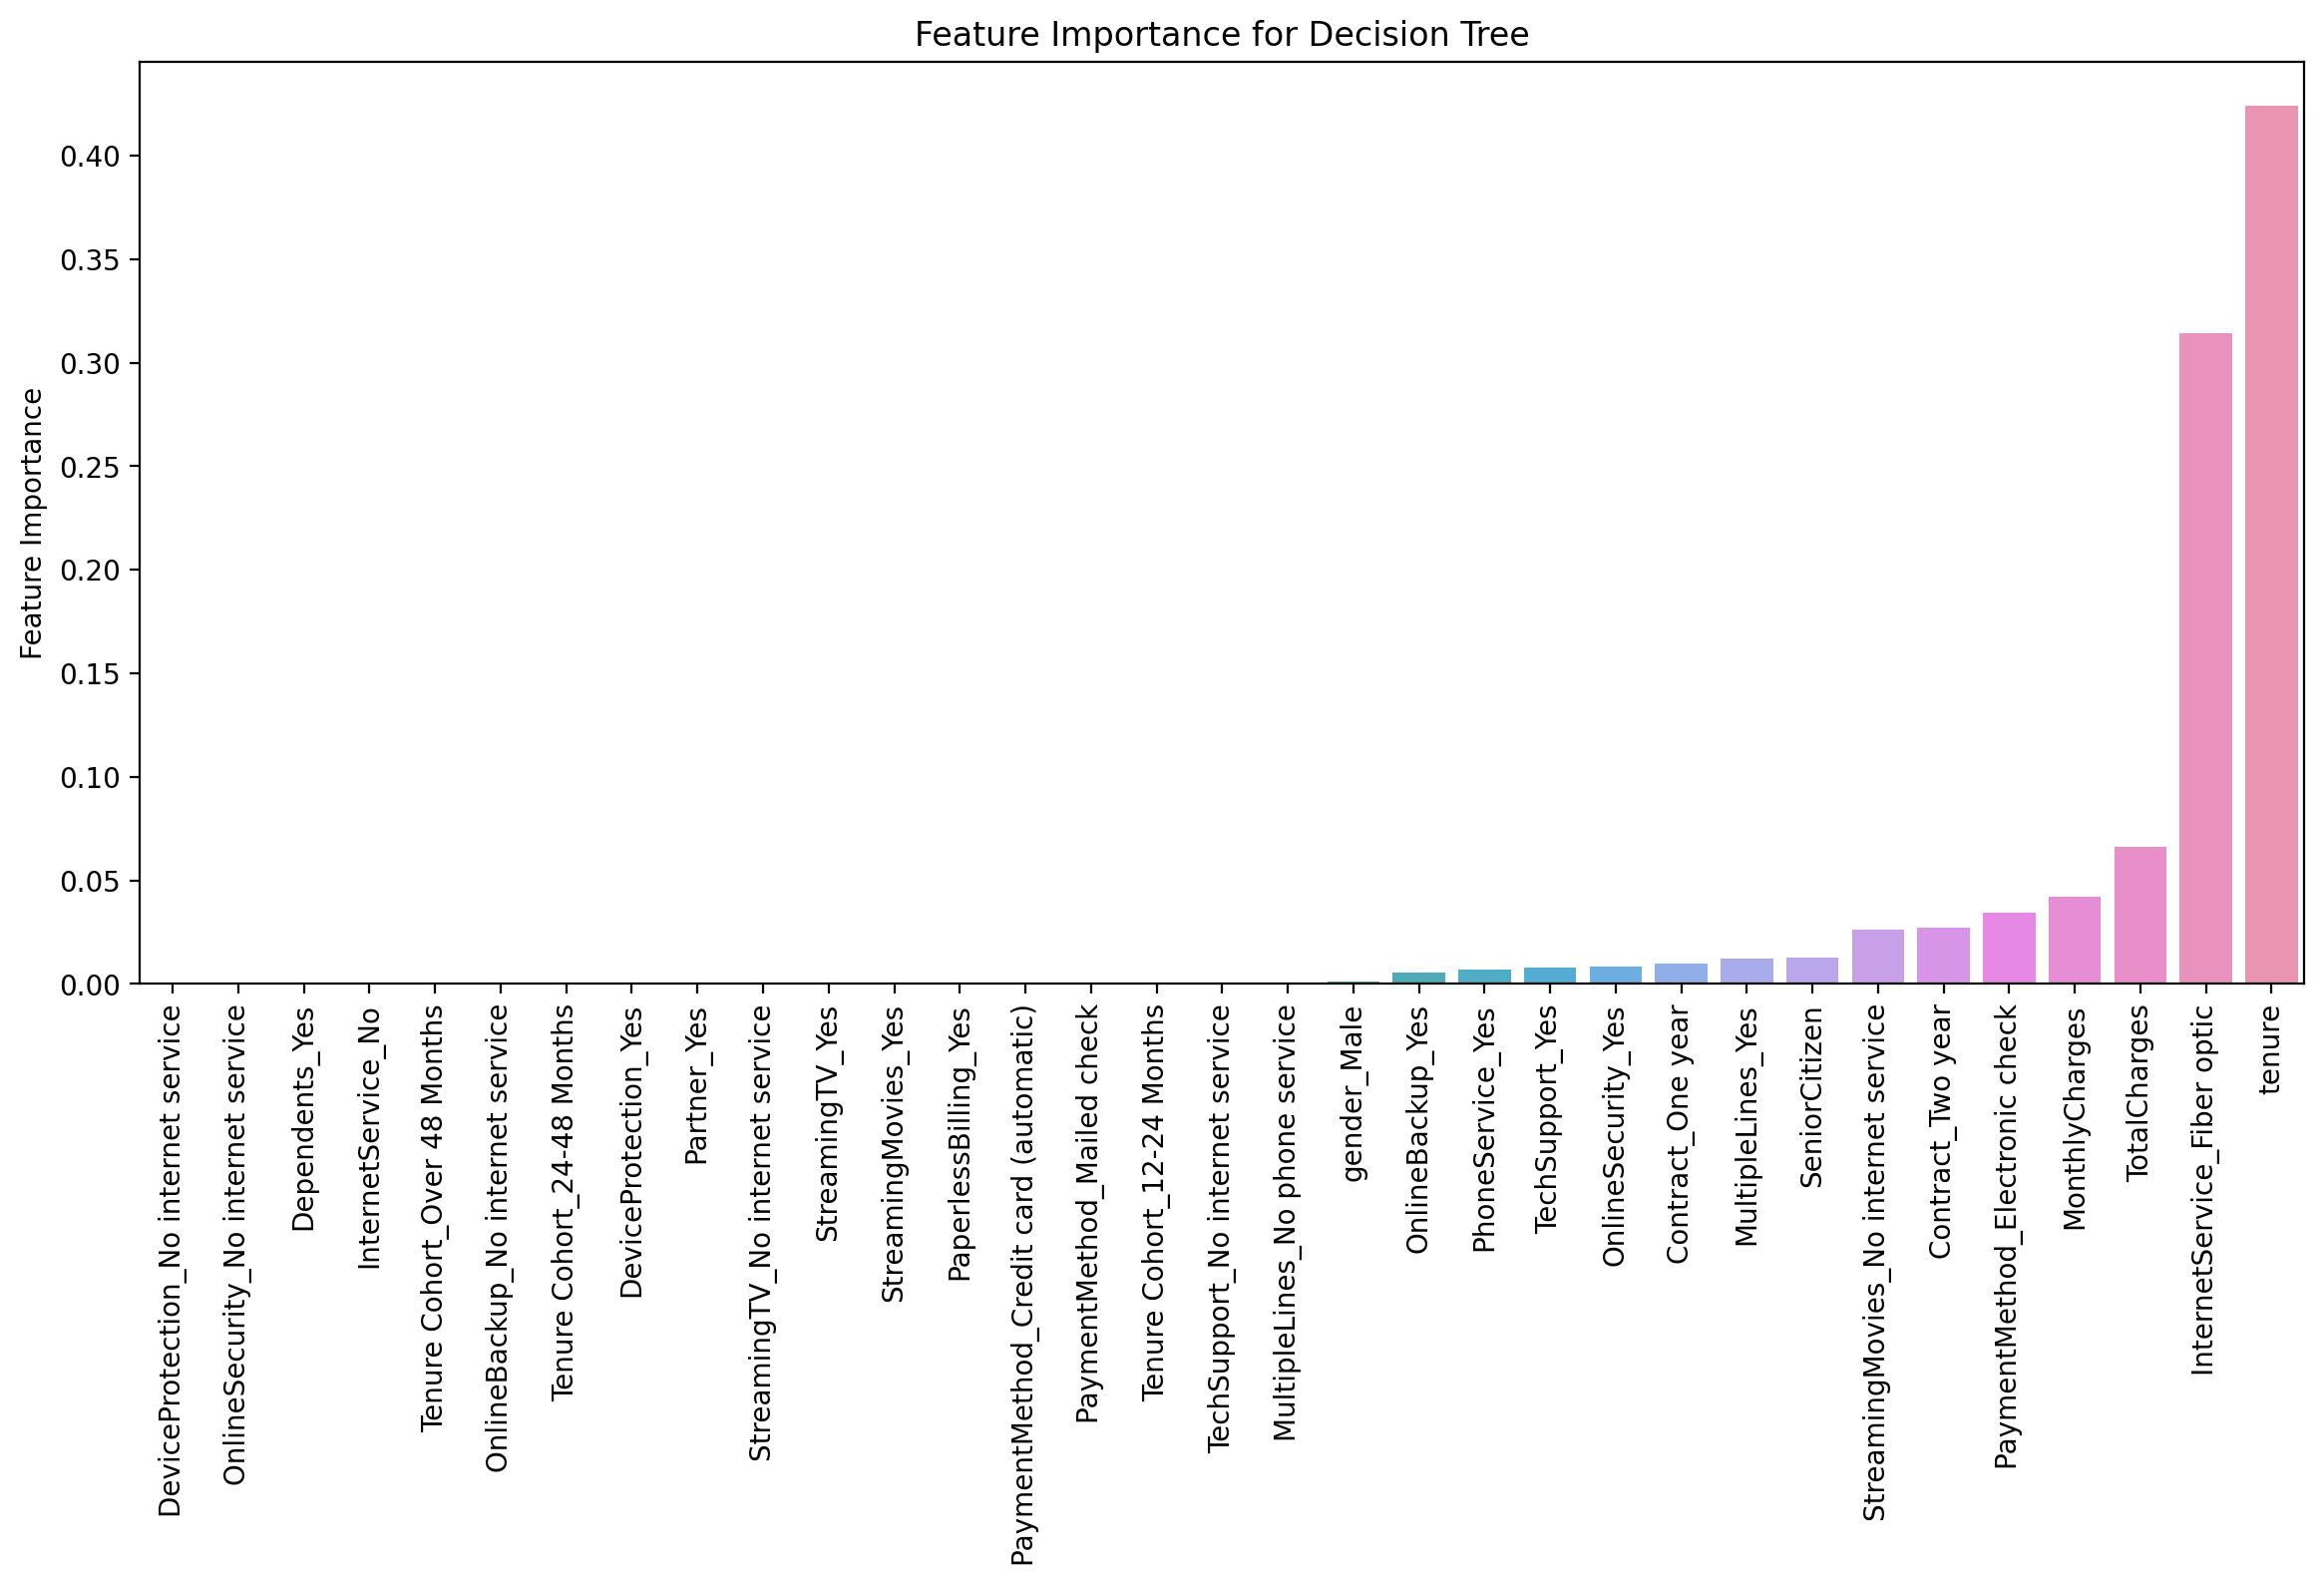

In [41]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [42]:
from sklearn.tree import plot_tree

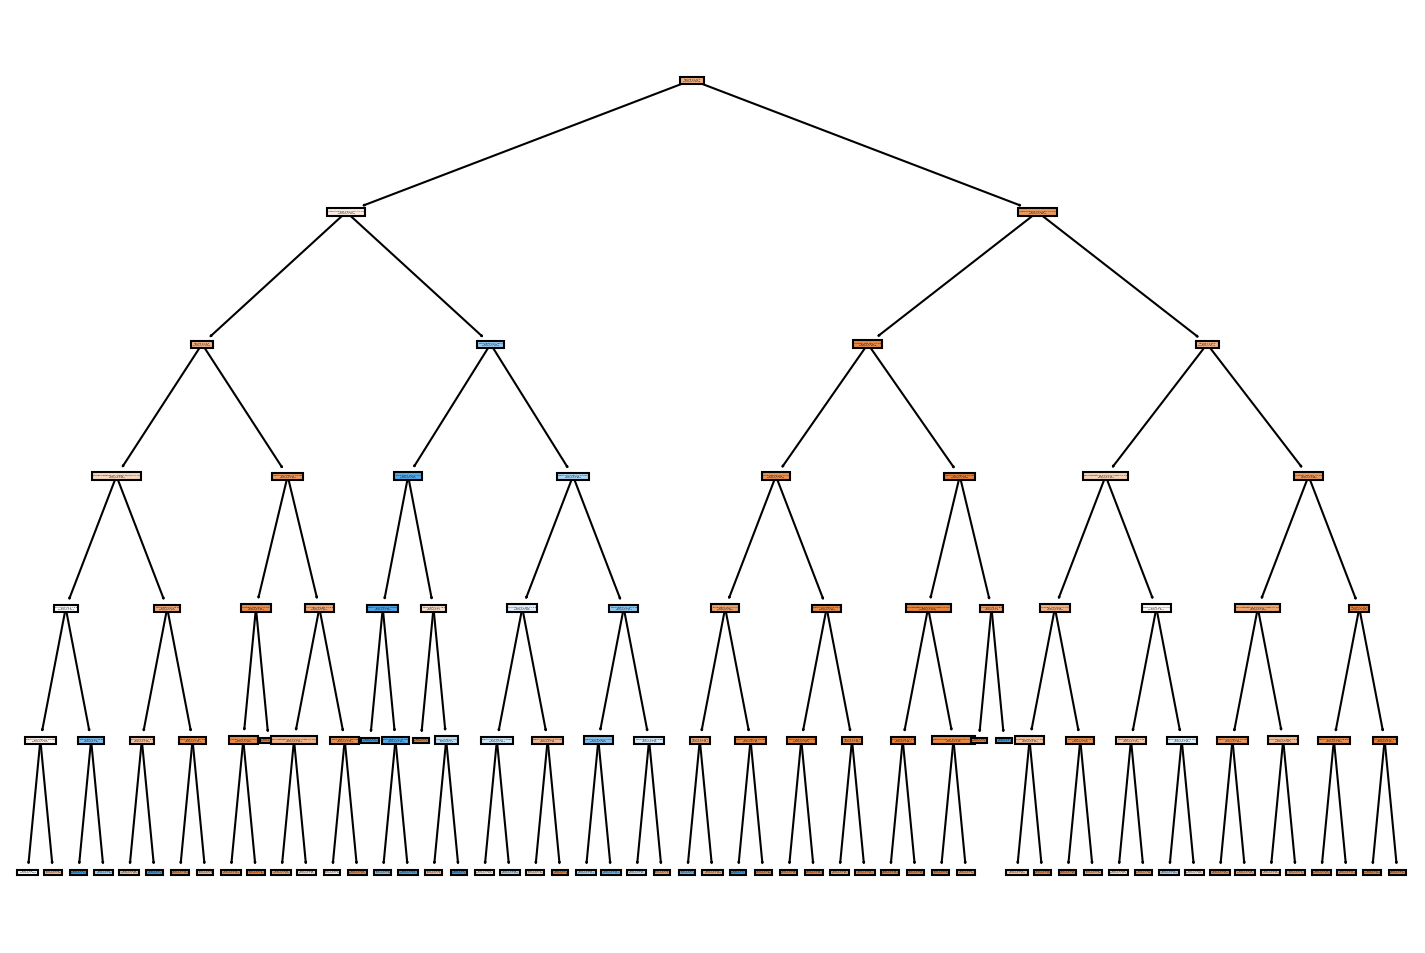

In [43]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

## Random forest

**Let's create a random forest model, then print a "classification report" and an error matrix for the predicted results on the test data set.**

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=100)

In [46]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
preds = rf.predict(X_test)

In [48]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.45      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



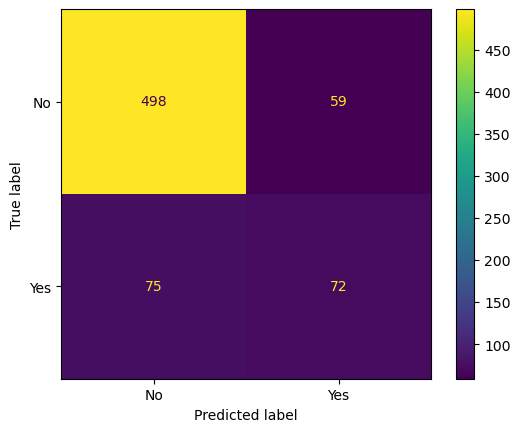

In [49]:
ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)

## Boosted Trees

**Let's create an AdaBoost or Gradient Boosting model, then print a "classification report" and an error matrix for the predicted results on the test data set.**

In [50]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [51]:
ada_model = AdaBoostClassifier()

In [52]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [53]:
preds = ada_model.predict(X_test)

In [54]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



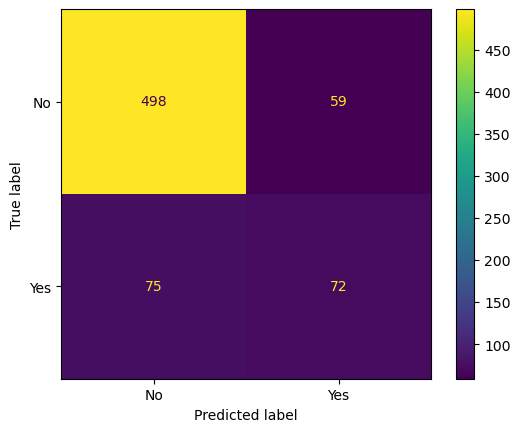

In [55]:
ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)

### Comparing the results, which model performs better than others?

The best results were obtained in the AdaBoostClassifier model, but grid search was not performed, and overall the models showed very similar results on this data.